In [1]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

2.0.3
1.25.2


In [2]:
import pandas as pd
s = pd.Series([1, 6, 8, 10])
s

0     1
1     6
2     8
3    10
dtype: int64

In [3]:
import os
if os.path.exists('Bias_correction_ucl.csv'):
    print('File exists')
else:
    print('File does not exist')


File exists


In [4]:
import pandas as pd
df = pd.read_csv('Bias_correction_ucl.csv')
print(df)


      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  2013-06-30          28.7          21.4    58.255688   
1         2.0  2013-06-30          31.9          21.6    52.263397   
2         3.0  2013-06-30          31.6          23.3    48.690479   
3         4.0  2013-06-30          32.0          23.4    58.239788   
4         5.0  2013-06-30          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  2017-08-30          23.3          17.1    26.741310   
7748     24.0  2017-08-30          23.3          17.7    24.040634   
7749     25.0  2017-08-30          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   

In [5]:
x= df.drop(columns= ['station','Next_Tmin', 'Date','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat',	'lon',	'LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1', 'Next_Tmax'])
x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,DEM,Slope,Solar radiation
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,212.3350,2.785000,5992.895996
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,44.7624,0.514100,5869.312500
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,33.3068,0.266100,5863.555664
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,45.7160,2.534800,5856.964844
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,35.0380,0.505500,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,15.5876,0.155400,4443.313965
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,17.2956,0.222300,4438.373535
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,19.5844,0.271300,4451.345215
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,12.3700,0.098475,4329.520508


In [6]:
Y= df['Next_Tmax']
Y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7747    28.3
7748    28.6
7749    27.8
7750    17.4
7751    38.9
Name: Next_Tmax, Length: 7752, dtype: float64

In [7]:
x.isnull()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,DEM,Slope,Solar radiation
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7747,False,False,False,False,False,False,False,False,False,False,False,False
7748,False,False,False,False,False,False,False,False,False,False,False,False
7749,False,False,False,False,False,False,False,False,False,False,False,False
7750,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
x.isnull()
x = x.fillna(x.median())
x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,DEM,Slope,Solar radiation
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,212.3350,2.785000,5992.895996
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,44.7624,0.514100,5869.312500
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,33.3068,0.266100,5863.555664
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,45.7160,2.534800,5856.964844
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,35.0380,0.505500,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,15.5876,0.155400,4443.313965
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,17.2956,0.222300,4438.373535
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,19.5844,0.271300,4451.345215
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,12.3700,0.098475,4329.520508


In [9]:
x.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
DEM                 0
Slope               0
Solar radiation     0
dtype: int64

In [12]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/18/36/60b58b6199547b7b46be03e05508d053162fbce146639bfc65609fa49b23/scikit_learn-1.3.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 2.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,Y, test_size=0.3, random_state=0)
x_train
x_test
y_train
y_test

4271    31.9
971     34.6
7541    29.7
4806    29.6
2048    32.0
        ... 
4162    33.0
5833    34.3
3814    28.8
3170    28.0
7401    29.0
Name: Next_Tmax, Length: 2326, dtype: float64

## 4. Training Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [15]:
import numpy as np
has_nan = np.isnan(y_train).any()
has_nan

True

In [16]:
median_value = np.nanmedian(y_train)
y_train_filled = np.nan_to_num(y_train, nan=median_value)

In [17]:
lr.fit(x_train, y_train_filled)

LinearRegression()

In [18]:
c=lr.intercept_
c

2.8028489814205386

In [19]:
m=lr.coef_
m

array([ 1.17113560e-01,  8.32234258e-02,  5.61766007e-04,  1.29643788e-02,
        6.36884650e-01,  1.08342397e-01, -1.45959847e-01,  8.62170190e-03,
       -1.62863501e+00, -4.31245675e-03,  1.94049225e-01,  1.07762379e-04])

In [20]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([33.89882449, 30.71516261, 29.35633252, ..., 31.93138721,
       29.90729827, 28.12681928])

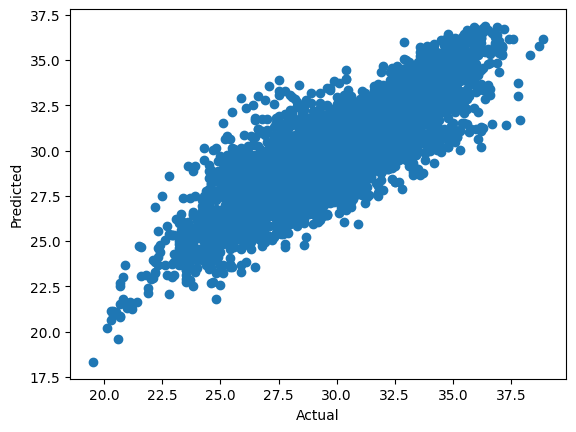

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_train_filled, y_pred_train)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(y_train_filled, y_pred_train)

0.7441053603934771

In [24]:
y_pred_tes = lr.predict(x_test)

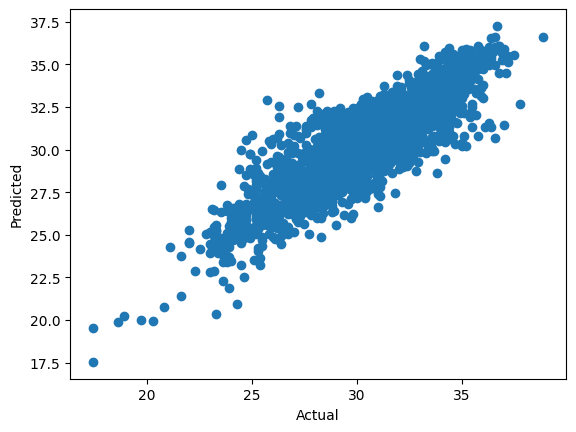

In [25]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_tes)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [26]:
has_nan = np.isnan(y_test).any()
has_nan

True

In [27]:
median_value = np.nanmedian(y_test)
y_test_filled = np.nan_to_num(y_test, nan=median_value)

In [28]:
r2_score(y_test_filled, y_pred_tes)

0.7555675015232707

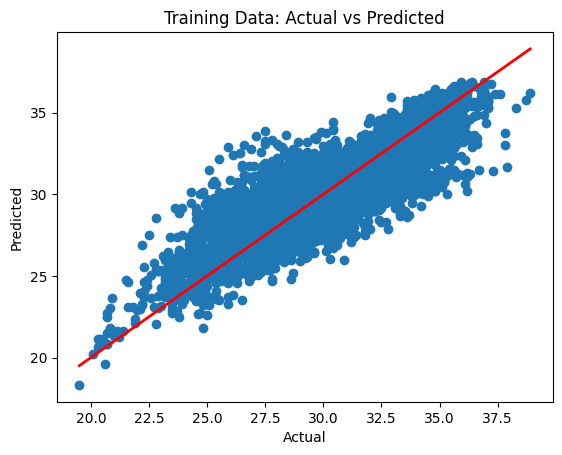

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y_train_filled, y_pred_train)
plt.plot([min(y_train_filled), max(y_train_filled)], [min(y_train_filled), max(y_train_filled)], linestyle='-', color='red', linewidth=2)  # Adding the regression line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Data: Actual vs Predicted")
plt.show()


## 5. Check the performance of model

In [33]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for training set predictions
mse_train = mean_squared_error(y_train_filled, y_pred_train)
print("Mean Squared Error (Train):", mse_train)

# Calculate MSE for testing set predictions
mse_test = mean_squared_error(y_test_filled, y_pred_tes)
print("Mean Squared Error (Test):", mse_test)


Mean Squared Error (Train): 2.4841612871681646
Mean Squared Error (Test): 2.406459701337773


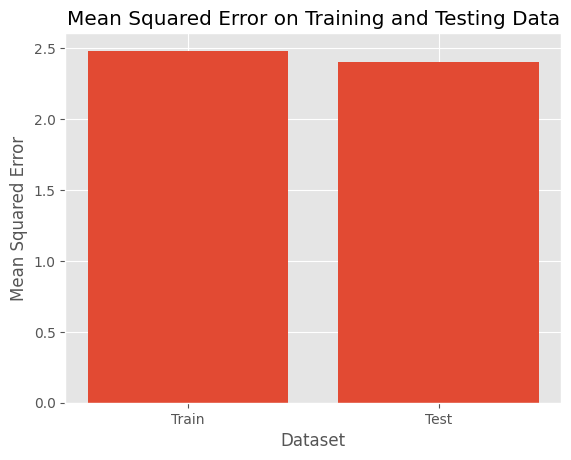

In [35]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

mse_train = mean_squared_error(y_train_filled, y_pred_train)

mse_test = mean_squared_error(y_test_filled, y_pred_tes)

mse_values = [mse_train, mse_test]
labels = ['Train', 'Test']

plt.bar(labels, mse_values)
plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error on Training and Testing Data')
plt.show()


### Submitted by Pulkit Batra (2021UCA1804)
### Submitted to Gaurav Singhal sir